<a href="https://colab.research.google.com/github/vanesalinas/HenryPI_DataAnalyst_PT06/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exploratory Data Analysis (EDA)***
---

> Explorar, entender y evaluar la calidad de los datos es una condicion previa al procesamiento de los mismos. Este analisis nos permitira saber si los datos que tenemos son suficientes para cumplir con el objetivo planteado asi como tambien permite identificar patrones de comportamiento, predecir sucesos e identificar oportunidades para crear un plan de accion que permita alcanzar dicho objetivo.

### ***Cargamos los datos y creamos un DataFrame***

---
Lo primero que haremos es cargar los datos en un DataFrame para poder manipularlos y observarlos.


In [1]:
#importamos las librerías a utilizar

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los avisos
%matplotlib inline

In [2]:
#Utilizaremos el parámetro sheet_name para especificar la hoja de debemos leer
df_hechos = pd.read_excel('/content/homicidios.xlsx', sheet_name='HECHOS')
df_victimas = pd.read_excel('/content/homicidios.xlsx', sheet_name='VICTIMAS')

###***Visualizamos el DataFrame***
---

In [3]:
#mostramos los primeros 5 registros en el dataset
df_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [4]:
df_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


### ***Y hacemos una exploracion de los datos***
---

*   Visualizamos la informacion general del DataFrame: la cantidad de datos, nombres de las columnas, indices, tipos de datos y el espacio que ocupa en memoria.
Conocer los tipos de datos de cada columna es importante ya que diferentes tipos de datos requieren diferentes técnicas de manejo y diferentes tipos de operaciones.

In [5]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [6]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


*   Tamaño de DataFrame: verificamos la cantidad de filas y columnas de cada DataFrame


In [7]:
df_hechos.shape

(696, 21)

In [8]:
df_victimas.shape

(717, 10)

*   Resumen estadistico: nos muestra estadisticas de los datos numericos como valor minimo y maximo, media, desviacion estandar y cuartiles.



In [9]:
df_hechos.describe()

,N_VICTIMAS,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018.188218,6.692529,15.936782,3336.635659,7.425287
std,0.179393,1.683754,3.571309,8.639646,3060.641793,4.387050
min,1.000000,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,16080.000000,15.000000


In [10]:
df_victimas.describe()

,AAAA,MM,DD
count,717.000000,717.000000,717.000000
mean,2018.174338,6.688982,15.960948
std,1.672655,3.575140,8.683358
min,2016.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000
50%,2018.000000,7.000000,16.000000
75%,2019.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


# ***Objetivo***
---

> El Observatorio de Movilidad y Seguridad Vial (OMSV), centro de estudios que se encuentra bajo la órbita de la Secretaría de Transporte del Gobierno de la Ciudad Autónoma de Buenos Aires, nos solicita la elaboración de un proyecto de anális de datos, con el fin de generar información que le permita a las autoridades locales tomar medidas para disminuir la cantidad de víctimas fatales de los siniestros viales.

Objetivo del proyecto de análisis de datos para reducir las víctimas fatales en siniestros viales:

"Utilizar técnicas de análisis de datos para identificar patrones, tendencias y factores de riesgo relacionados con los siniestros viales en la Ciudad Autónoma de Buenos Aires, con el fin de proporcionar información detallada y relevante a las autoridades locales. Esta información será utilizada para diseñar e implementar intervenciones efectivas, basadas en la evidencia proporcionada sobre homicidios en siniestros viales acaecidos en la Ciudad de Buenos Aires durante el periodo 2016-2021, para contribuir a la reducción significativa de la cantidad de víctimas fatales en accidentes de tráfico en el área urbana."




### ***Analisis de los datos***
---
> En base a nuestro objetivo comenzaremos a analizar nuestros DataFrame para llegar a las conclusiones necesarias y esperadas para cumplir con éste.

*   Valores duplicados

En el df_victimas se repiten algunos ID_hecho; esto puede deberse a un error en la asignacion del ID_hecho del dataset proporcionado, por lo que voy a eliminar los valores duplicados, dejando solo el primer registro.

In [11]:
# Normalizar los datos de la columna 'ID_hecho' (eliminar espacios en blanco y convertir a minúsculas)
df_victimas['ID_hecho'] = df_victimas['ID_hecho'].str.strip().str.lower()

# Ordenar el DataFrame según la columna 'ID_hecho'
df_victimas = df_victimas.sort_values(by='ID_hecho').reset_index(drop=True)

# Eliminar filas donde el valor en la columna 'ID_hecho' es igual al de la fila anterior
df_victimas = df_victimas[df_victimas['ID_hecho'] != df_victimas['ID_hecho'].shift()]

# Reindexar el DataFrame
df_victimas = df_victimas.reset_index(drop=True)

In [12]:
df_victimas.loc[df_victimas['ID_hecho'] == '2016-0041']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
29,2016-0041,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,2016-03-29 00:00:00


Realizamos el mismo procedimiento en el df_hechos por si tambien contiene valores duplicados y vamos a renombrar la columna ID

In [13]:
#renombramos la columna ID del df_hechos para luego poder concatenar los datos de ambos DataFrame
df_hechos = df_hechos.rename(columns={'ID': 'ID_hecho'})

# Normalizar los datos de la columna 'ID_hecho' (eliminar espacios en blanco y convertir a minúsculas)
df_hechos['ID_hecho'] = df_hechos['ID_hecho'].str.strip().str.lower()

# Ordenar el DataFrame según la columna 'ID_hecho'
df_hechos = df_hechos.sort_values(by='ID_hecho').reset_index(drop=True)

# Eliminar filas donde el valor en la columna 'ID_hecho' es igual al de la fila anterior
df_hechos = df_hechos[df_hechos['ID_hecho'] != df_hechos['ID_hecho'].shift()]

# Reindexar el DataFrame
df_hechos = df_hechos.reset_index(drop=True)

df_hechos.loc[df_hechos['ID_hecho'] == '2016-0041']

,ID_hecho,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
29,2016-0041,2,2016-03-29,2016,3,29,11:00:00,11,AV DIRECTORIO Y RIVERA INDARTE,AVENIDA,...,NaN,RIVERA INDARTE AV.,DIRECTORIO AV. y RIVERA INDARTE AV.,7,Point (100232.38564985 99530.25843190),-58.46076550,-34.63350444,MOTO-CARGAS,MOTO,CARGAS


Unimos los DataFrame para que toda la informacion quede contenida en un unico DataFrame

In [14]:
#unimos los DataFrame
df_combinado = pd.merge(df_hechos, df_victimas[['ID_hecho', 'ROL', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO']], on='ID_hecho', how='left')

#visualizamos el nuevo DataFrame
df_combinado.head()

,ID_hecho,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00


In [15]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID_hecho               696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [16]:
df_combinado[df_combinado['ID_hecho'] == '2016-0041']

,ID_hecho,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
29,2016-0041,2,2016-03-29,2016,3,29,11:00:00,11,AV DIRECTORIO Y RIVERA INDARTE,AVENIDA,...,Point (100232.38564985 99530.25843190),-58.46076550,-34.63350444,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,54,2016-03-29 00:00:00


*   Valores faltantes

In [17]:
df_combinado.isnull().sum()


ID_hecho                   0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
ROL                        0
SEXO                       0
EDAD                       0
FECHA_FALLECIMIENTO        0
dtype: int64

No realizare ninguna modificacion a los datos faltantes porque no creo que alteren el resultado final del analisis

*   Analizar el numero de victimas por año

In [18]:
# Contar el número de víctimas por año
victimas_por_año = df_combinado.groupby('AAAA')['N_VICTIMAS'].sum()
victimas_por_año

AAAA
2016    146
2017    140
2018    149
2019    104
2020     81
2021     97
Name: N_VICTIMAS, dtype: int64

Presentamos en un grafico de linea la informacion obtenida para visualizar la tendencia a lo largo del tiempo.

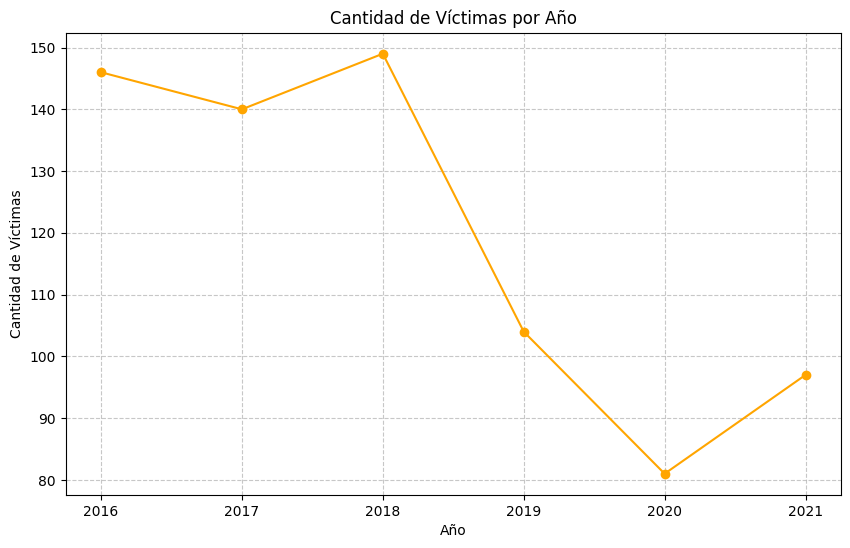

In [19]:
plt.figure(figsize=(10, 6))
victimas_por_año.plot(kind='line', marker='o', color='orange', linestyle='-')
plt.title('Cantidad de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Vemos que con el correr de los años hubo una disminucion en la cantidad de victimas; esto significa que las medidas que se fueron implementando en el tiempo han sido de utilidad y mejoraron la seguridad vial, a pesar de los casos que aun se mantienen.

*   Analizar el numero de victimas por comuna y por año

In [20]:
sorted(df_combinado['COMUNA'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
# Contar el número de víctimas por comuna y agrupar por año
victimas_por_año_comuna = df_combinado.groupby(['COMUNA', 'AAAA'])['N_VICTIMAS'].sum()
victimas_por_año_comuna


COMUNA  AAAA
0       2016     2
1       2016    22
        2017    20
        2018    20
        2019    12
                ..
15      2017     5
        2018    11
        2019     9
        2020     7
        2021     5
Name: N_VICTIMAS, Length: 91, dtype: int64

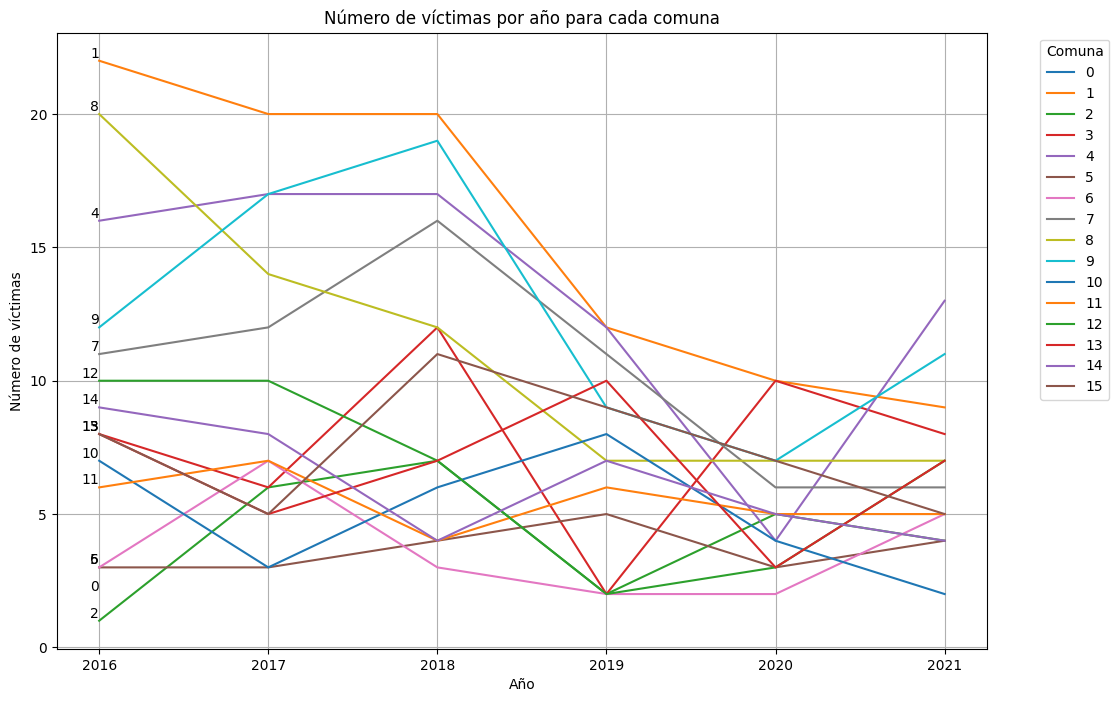

In [22]:
# Graficar el número de víctimas por año para cada comuna
plt.figure(figsize=(12, 8))

# Inicializamos un contador
contador = 0

for comuna in victimas_por_año_comuna.index.get_level_values('COMUNA').unique():
    data_comuna = victimas_por_año_comuna.loc[comuna]
    plt.plot(data_comuna.index.get_level_values('AAAA'), data_comuna.values, label=comuna)

    # Agregar texto con el número de comuna en el primer punto de cada línea
    plt.text(data_comuna.index.get_level_values('AAAA')[0], data_comuna.values[0], comuna,
             horizontalalignment='right', verticalalignment='bottom')

plt.title('Número de víctimas por año para cada comuna')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')
plt.legend(title='Comuna', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

La comuna 1 es la que mayor numeros de victimas ha tenido por lo que se deberia evaluar esta situacion. Otro punto a prestar especial atencion es el aumento en los casos de la comuna 4.



*   Numero de victimas segun tipo de vehiculo



In [23]:
sorted(df_combinado['VICTIMA'].unique())

['AUTO',
 'BICICLETA',
 'CARGAS',
 'MOTO',
 'MOVIL',
 'OBJETO FIJO',
 'PASAJEROS',
 'PEATON',
 'PEATON_MOTO',
 'SD']

A fines de realizar el analisis categorizaremos el tipo de vehiculo segun la siguiente escala:

1.  AUTO
2.  BICICLETA
3.  CARGAS
4.  MOTO
5.  MOVIL
6.  OBJETO FIJO
7.  PASAJEROS
8.  PEATON
9.  PEATON_MOTO
10. SD

In [24]:
# Definir el diccionario de mapeo de categorías
diccionario_categorias = {
    'AUTO': 1,
    'BICICLETA': 2,
    'CARGAS': 3,
    'MOTO': 4,
    'MOVIL': 5,
    'OBJETO FIJO': 6,
    'PASAJEROS': 7,
    'PEATON': 8,
    'PEATON_MOTO': 9,
    'SD': 10
}

# Crear una nueva columna 'TIPO_VEHICULO' basada en la columna 'VICTIMA'
df_combinado['TIPO_VEHICULO'] = df_combinado['VICTIMA'].replace(diccionario_categorias)

In [25]:
# Contar el número de víctimas según el tipo de vehículo
victimas_por_tipo_vehiculo = df_combinado.groupby('TIPO_VEHICULO')['N_VICTIMAS'].sum()
victimas_por_tipo_vehiculo

TIPO_VEHICULO
1      92
2      29
3       7
4     302
5       3
6       2
7       5
8     266
9       2
10      9
Name: N_VICTIMAS, dtype: int64

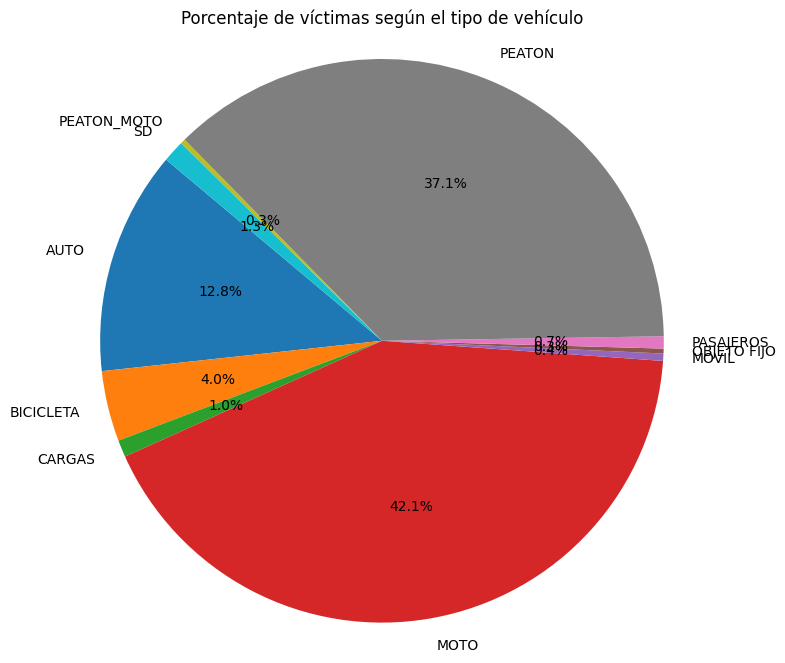

In [26]:
# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(victimas_por_tipo_vehiculo, labels=diccionario_categorias, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de víctimas según el tipo de vehículo')
plt.axis('equal')  # La proporción de aspecto igual garantiza que el gráfico circular se dibuje como un círculo
plt.show()

Podemos observar que la mayor cantidad de victimas son motociclistas y peatones, luego automovilistas.

*   Correlacion de variables

Buscamos patrones que relacionen unas variables con otras, la correlación entre variables puede ser positiva, es decir cuando una aumenta su valor la variable correlacionada aumenta su valor también en una proporción, si la correlación es negativa, cuando una variable aumenta la otra disminuye en una proporción y vice versa.

Cambiaremos el tipo de datos de la columna edad para poder incluirla en el analisis de correlacion

In [27]:
# Convertir la columna 'EDAD' a tipo numérico, los valores no numéricos se convertirán a NaN
df_combinado['EDAD'] = pd.to_numeric(df_combinado['EDAD'], errors='coerce')

# Reemplazar los NaN por 0 en la columna 'EDAD'
df_combinado['EDAD'] = df_combinado['EDAD'].fillna(0)

# Convertir la columna 'EDAD' a tipo entero
df_combinado['EDAD'] = df_combinado['EDAD'].astype(int)

In [28]:
matriz_correlacion = df_combinado.corr()
matriz_correlacion

,N_VICTIMAS,AAAA,MM,DD,Altura,COMUNA,EDAD,TIPO_VEHICULO
N_VICTIMAS,1.000000,-0.047410,-0.005711,0.011444,0.092772,0.007439,-0.071959,-0.112312
AAAA,-0.047410,1.000000,-0.047072,-0.038448,0.040609,0.009211,0.087000,-0.030245
MM,-0.005711,-0.047072,1.000000,-0.019331,0.071570,0.047205,0.029546,-0.008188
DD,0.011444,-0.038448,-0.019331,1.000000,-0.004142,-0.001415,-0.006855,-0.021477
Altura,0.092772,0.040609,0.071570,-0.004142,1.000000,0.293925,-0.067943,-0.040484
COMUNA,0.007439,0.009211,0.047205,-0.001415,0.293925,1.000000,-0.050930,-0.056247
EDAD,-0.071959,0.087000,0.029546,-0.006855,-0.067943,-0.050930,1.000000,0.273135
TIPO_VEHICULO,-0.112312,-0.030245,-0.008188,-0.021477,-0.040484,-0.056247,0.273135,1.000000


El coeficiente de correlación es un valor entre -1 y 1 que indica la fuerza y la dirección de la relación entre las dos características. Un valor cercano a 1 indica una relación positiva fuerte, un valor cercano a -1 indica una relación negativa fuerte, y un valor cercano a 0 indica que no hay relación.

*   Visualizacion de la matriz correlacion

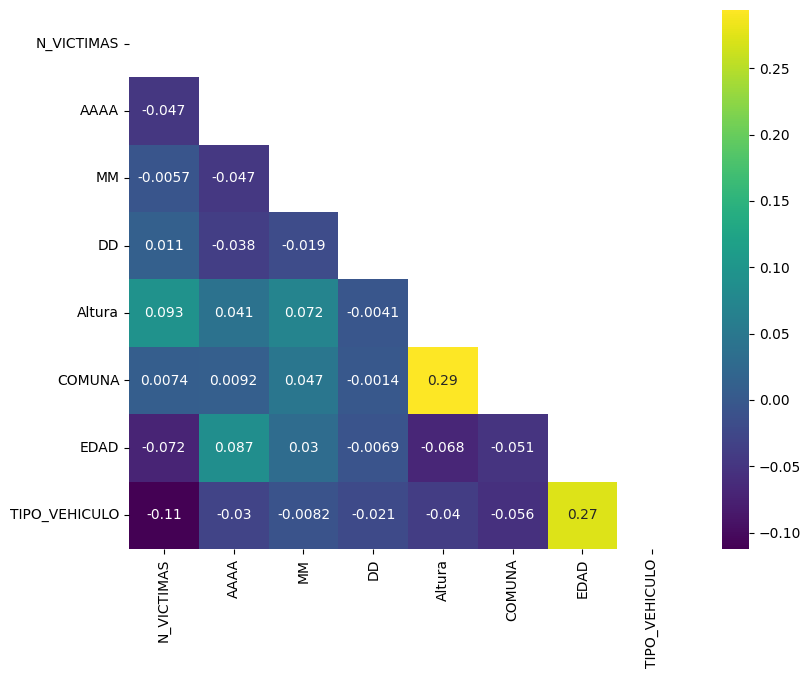

In [29]:
#Definimos el tamaño de la figura para asegurar que se observen los valores interiores
ax = plt.subplots(figsize=(9,7))

#Generamos una máscara para evitar tener un espejo en la parte superior de la gráfica y simplificar la observación
mask = np.zeros_like(matriz_correlacion)
mask[np.triu_indices_from(mask)] = True

#Usando seaborn heatmap como tipo de gráfica, colocamos los valores de la matriz de correlaciones, solicitamos que incluya los coeficientes de correlación a las celdas del mapa de calor con el argumento annot=True, seleccionamos un mapa de color y selecciónamos la máscara para no mostrar los datos duplicados, iniciando por la diagonal de unos en la parte central de la gráfica
ax = sns.heatmap(matriz_correlacion,annot=True,cmap='viridis',mask = mask)


Podemos confirmar que el año y el numero de victimas tienen una correlacion negativa; a medida que pasaron los años disminuyo el numero de victimas. Por otro lado, la edad y el tipo de vehiculo tienen una correlacion positiva; a medida que aumenta el numero que identifica el tipo de vehiculo aumenta la edad. Pero un dato muy importante que arroja esta matriz de correlaciones es la relacion entre el numero de victimas y el tipo de vehiculo; a medida que aumenta el numero que identifica el tipo de vehiculo disminuye el numero de victimas, por lo que podriamos afirmar que hay mayor cantidad de muertes de motociclistas o automovilistas pero nos encontramos frente a un outlier respecto a la cantidad de victimas que son peatones.

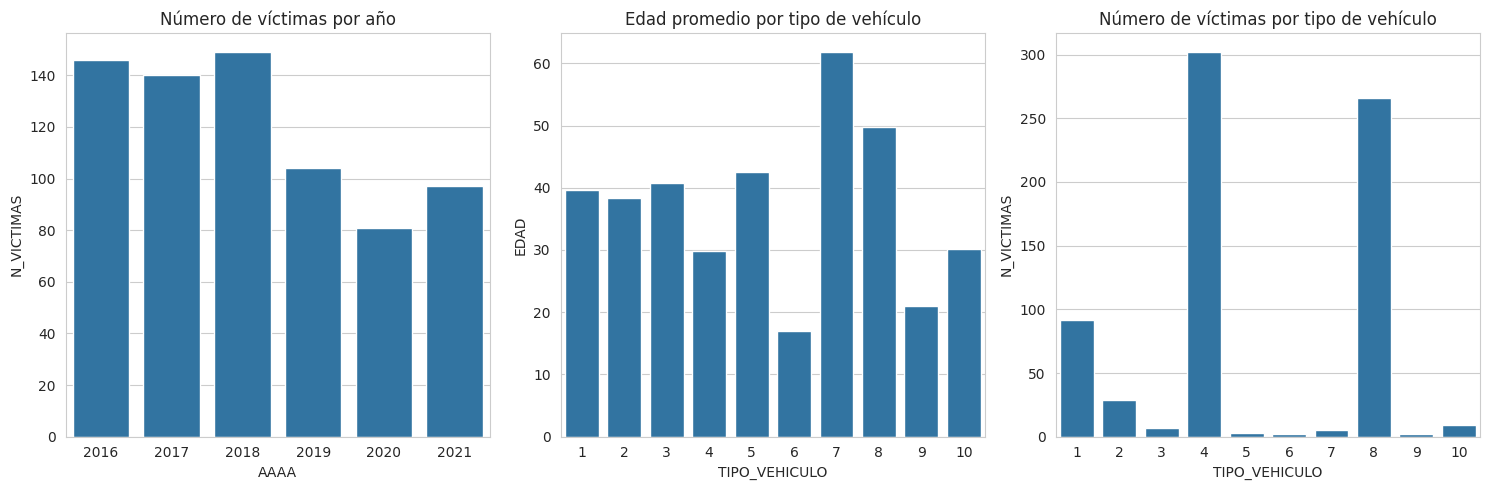

In [39]:
# Configurar la figura y las subparcelas
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Graficar el número de víctimas por año
sns.barplot(x='AAAA', y='N_VICTIMAS', data=df_combinado.groupby('AAAA')['N_VICTIMAS'].sum().reset_index(), ax=axs[0])
axs[0].set_title('Número de víctimas por año')

# Graficar la edad promedio por tipo de vehículo
sns.barplot(x='TIPO_VEHICULO', y='EDAD', data=df_combinado.groupby('TIPO_VEHICULO')['EDAD'].mean().reset_index(), ax=axs[1])
axs[1].set_title('Edad promedio por tipo de vehículo')

# Graficar el número de víctimas por tipo de vehículo
sns.barplot(x='TIPO_VEHICULO', y='N_VICTIMAS', data=df_combinado.groupby('TIPO_VEHICULO')['N_VICTIMAS'].sum().reset_index(), ax=axs[2])
axs[2].set_title('Número de víctimas por tipo de vehículo')

plt.tight_layout()
plt.show()

*   Valores atípicos

Con un diagrama de caja podemos identificar valores atipicos. Estos valores pueden ser causados por diversos factores, como errores de medición o variabilidad genuina de los datos.

Podemos utilizar los Cuartiles como herramienta estadística, éstos son cuantiles que se multiplican por un cuarto de un conjunto de datos, es decir dividimos los datos en 4 porciones iguales y observamos cuántos registros están en cada uno de estos cuartiles. Boxplot, nos muestra estos cuatro cuartiles, la distancia entre ellos y si hay registros que salgan de estos segmentos, datos que consideramos atípicos.


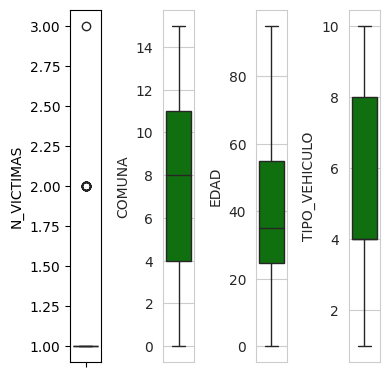

In [30]:
#Obtenemos el nombre de las columnas
columnas = ['N_VICTIMAS', 'COMUNA', 'EDAD', 'TIPO_VEHICULO']
col_num = 4

#calculamos el eje vertical para el tamaño de la gráfica
row_num = int(len(columnas)-1/col_num)

#Definimos el tamaño de forma dinámica para poder reutilizar el código
plt.figure(figsize=(col_num,5*row_num))

#Creamos una gráfica de cajas para cada columna
for i in range(0,len(columnas)):
  plt.subplot(row_num + 1, col_num,i+1)
  sns.set_style('whitegrid')
  #IMPORTANTE Para visualizar los gráficos de forma vertical es importante especificar los datos en la variable 'y' de esta manera 'y=data'
  sns.boxplot(y=df_combinado[columnas[i]],color='green',orient='v')
  plt.tight_layout()


La primer barra horizontal de abajo hacia arriba muestra el valor mínimo, el siguiente es el inicio de la caja de color, aquí se muestra el 25% de nuestros datos, luego hay una línea horizontal dentro de la caja que representa la mediana, la siguiente línea horizontal y límite superior de la caja es el 75% de los datos y por último la línea vertical en la parte superior nos muestra el valor máximo.

Vemos que los valores atipicos se encuentran en el numero de victimas, pero esto no representa un error, sino que en la mayoria de los casos hay solo una victima pero tambien se dieron hechos en los que hubo dos y hasta tres victimas.

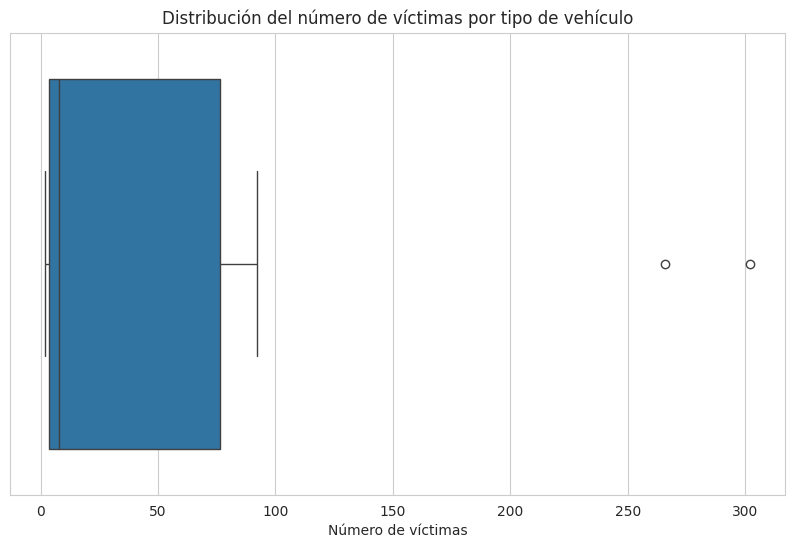

In [31]:
# Crear un DataFrame con los datos de victimas por tipo de vehiculo
df_victimas_por_tipo_vehiculo = victimas_por_tipo_vehiculo.reset_index()

# Graficar un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_victimas_por_tipo_vehiculo, x='N_VICTIMAS')
plt.title('Distribución del número de víctimas por tipo de vehículo')
plt.xlabel('Número de víctimas')
plt.show()

Los puntos que salen de estos valores de cuartiles indican que se alejan mucho del valor medio de los datos, por lo que se consideran datos atípicos. Los puntos atipicos que vemos en el grafico correspone a motos y peatones, esto es asi porque la mayor cantidad de victimas se da en estos tipos de vehiculos.